In [1]:
import sys, os
sys.path.append(os.path.abspath('../functions'))

# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Old API
from StCoordLine import StCoordLine as StCoordLine
from CalcMV import CalcMV as CalcMV

# New API
from st_coord_line import eq_angle_stereonet
from calc_mv import calc_mv

In [2]:
# Arrays T and P contain the trend (T) 
# and plunge (P) of the 10 poles
T = np.array([206, 220, 204, 198, 200, 188, 192, 228, 236, 218])
P = np.array([32, 30, 46, 40, 20, 32, 54, 56, 36, 44])

Mean vector trend = 208.6, plunge 40.0
Mean resultant length = 0.963


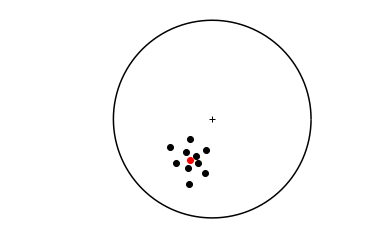

In [3]:
# Old API
# Convert T and P from degrees to radians
pi = np.pi
TR = T * pi/180
PR = P * pi/180

# Compute the mean vector and print orientation
# and mean resultant length
trd, plg, Rave, conc, d99, d95 = CalcMV(TR,PR)
print('Mean vector trend = {:.1f}, plunge {:.1f}'.format(trd*180/pi,plg*180/pi))
print('Mean resultant length = {:.3f}'.format(Rave))

# Plot the primitive of the stereonet
r = 1; # unit radius
TH = np.arange(0,360,1)*pi/180
x = r * np.cos(TH)
y = r * np.sin(TH)
plt.plot(x,y,'k')
# Plot center of circle
plt.plot(0,0,'k+')
# Make axes equal and remove them
plt.axis('equal')
plt.axis('off')

# Plot the poles as black points
# on an equal angle stereonet
npoles = len(T)
eqAngle = np.zeros((npoles, 2))
for i in range(npoles):
    # Equal angle coordinates
    eqAngle[i,0], eqAngle[i,1] = StCoordLine(TR[i],PR[i],0)
plt.plot(eqAngle[:,0],eqAngle[:,1],'ko')

# Plot the mean vector as a red point
mvx, mvy = StCoordLine(trd,plg,0)
plt.plot(mvx,mvy,'ro');

Mean vector trend = 208.6, plunge 40.0
Mean resultant length = 0.963


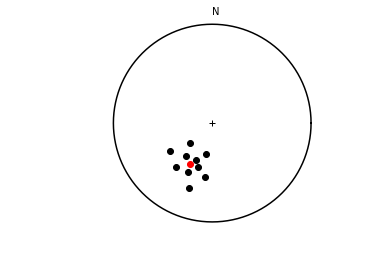

In [4]:
# New API
# Convert T and P from degrees to radians
TR = np.radians(T)
PR = np.radians(P)

# Compute the mean vector and print orientation
# and mean resultant length
trd, plg, Rave = calc_mv(TR, PR)
print('Mean vector trend = {:.1f}, plunge {:.1f}'.format(np.degrees(trd), np.degrees(plg)))
print('Mean resultant length = {:.3f}'.format(Rave))

# Plot the primitive of the stereonet
r = 1; # unit radius
TH = np.radians(np.arange(0, 361, 1))
x = r * np.cos(TH)
y = r * np.sin(TH)
plt.plot(x,y,'k')
# Plot center of circle
plt.plot(0,0,'k+')
# Plot North label
plt.text(0,1.1,'N')
# Make axes equal and remove them
plt.axis('equal')
plt.axis('off')

# Plot the poles as black points
# on an equal angle stereonet
npoles = len(T)
eq_angle = np.zeros((npoles, 2))
for i in range(npoles):
    # Equal angle coordinates
    eq_angle[i,0], eq_angle[i,1] = eq_angle_stereonet(TR[i],PR[i])
plt.plot(eq_angle[:,0],eq_angle[:,1],'ko')

# Plot the mean vector as a red point
mvx, mvy = eq_angle_stereonet(trd,plg)
plt.plot(mvx,mvy,'ro');